<a href="https://colab.research.google.com/github/liyzcj/ann/blob/master/neural_network/Wgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
  
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip install mnist

In [0]:
import torch
import torch.nn.functional as nn
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
import torchvision.datasets as dsets

## Dataset

In [0]:
def show_mnist(X, title = None, loc = 'center',**kwargs):
    num = X.shape[0]
    if num <= 10:
        imgs = np.moveaxis(X.reshape(-1, num, 28, 28), 1, 2).reshape(-1, num * 28)
        plt.figure(figsize=(num/2,num))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 100 and num % 10 == 0:
        imgs = np.moveaxis(X.reshape(-1, 10, 28, 28), 1, 2).reshape(-1, 10 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 200 and num % 20 == 0:
        imgs = np.moveaxis(X.reshape(-1, 20, 28, 28), 1, 2).reshape(-1, 20 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    else:
        print(f'{num} not fit, choose from:')
        print(list(range(1,10)))
        print([x for x in range(10,100,10)])
        print([x for x in range(100,1000,100)])
    plt.show()

### Mnist

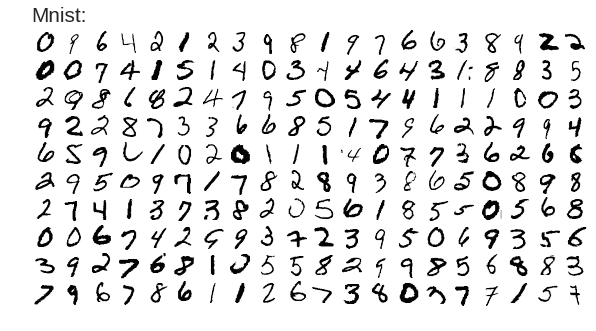

In [0]:
import mnist
mnist = mnist.train_images()
mnist = mnist.reshape(-1,784)
idxs = np.random.choice(len(mnist), 200)
show_mnist(mnist[idxs],'Mnist:',loc = 'left', fontsize = 'xx-large')
mnist = mnist/255
mnist = torch.from_numpy(mnist).float()

In [0]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

fashion_mnist = dsets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transform,
                            download=True
                           )

fmnist = fashion_mnist.train_data
fmnist = fmnist.reshape(-1,784).float()
fmnist = fmnist / 255

### Fashion-Mnist

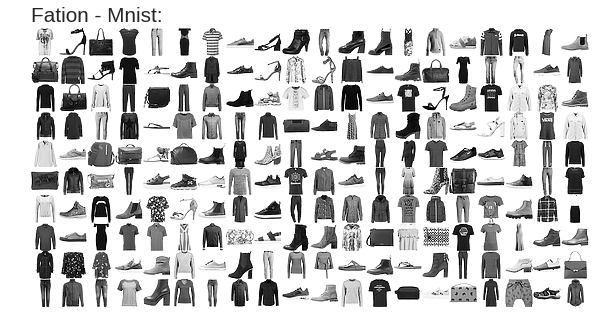

In [0]:
idxs = np.random.choice(len(fmnist), 200)
imgs = fmnist[idxs].numpy()
show_mnist(imgs,'Fation - Mnist:',loc = 'left', fontsize = 'xx-large')

## WGAN

### Hyperparameters

In [0]:
mb_size = 32
z_dim = 10
X_dim = 784
h_dim = 128
lr = 1e-3

### Generater

In [0]:
G = torch.nn.Sequential(
    torch.nn.Linear(z_dim, h_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(h_dim, X_dim),
    torch.nn.Sigmoid()
)

### Discriminator

In [0]:
D = torch.nn.Sequential(
    torch.nn.Linear(X_dim, h_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(h_dim, 1),
)

### Gradient

In [0]:
def reset_grad():
    G.zero_grad()
    D.zero_grad()


G_solver = optim.RMSprop(G.parameters(), lr=lr)
D_solver = optim.RMSprop(D.parameters(), lr=lr)

### Train

Iter-0; D_loss: -0.08935198187828064; G_loss: 0.10396416485309601


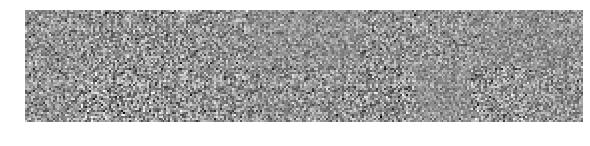

Iter-1000; D_loss: -0.010654732584953308; G_loss: 0.16543130576610565


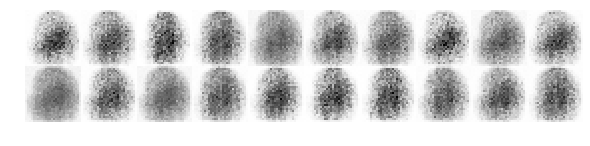

Iter-2000; D_loss: -0.06642842292785645; G_loss: 0.02089744433760643


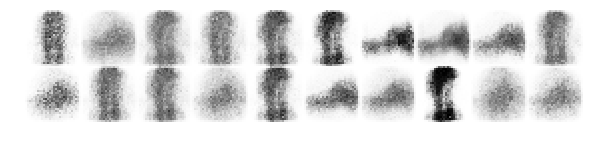

Iter-3000; D_loss: -0.04908367991447449; G_loss: -0.015340895392000675


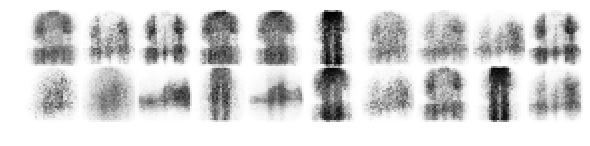

Iter-4000; D_loss: -0.04071974381804466; G_loss: -0.015297370962798595


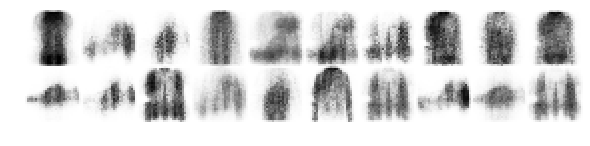

Iter-5000; D_loss: -0.025888068601489067; G_loss: -0.01873176172375679


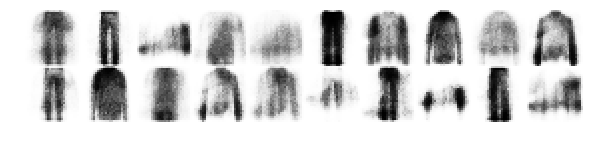

Iter-6000; D_loss: -0.027963731437921524; G_loss: -0.01332771498709917


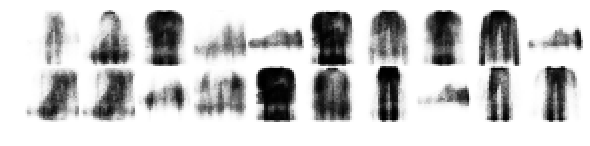

Iter-7000; D_loss: -0.02336280606687069; G_loss: -0.008544047363102436


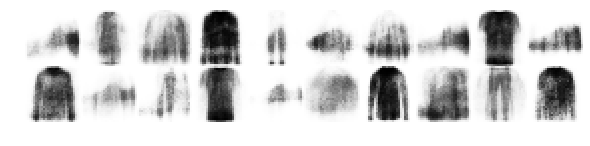

Iter-8000; D_loss: -0.01814897730946541; G_loss: -0.006140456534922123


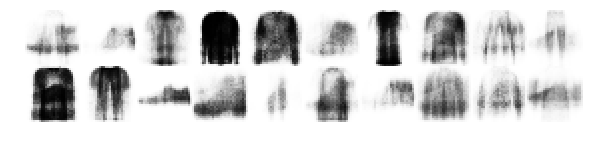

Iter-9000; D_loss: -0.021550117060542107; G_loss: -0.009668216109275818


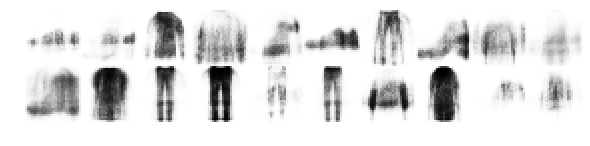

Iter-10000; D_loss: -0.027218226343393326; G_loss: -0.017589092254638672


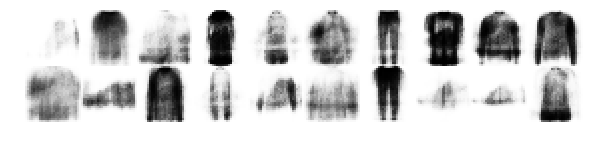

Iter-11000; D_loss: -0.014619492925703526; G_loss: -0.011753586120903492


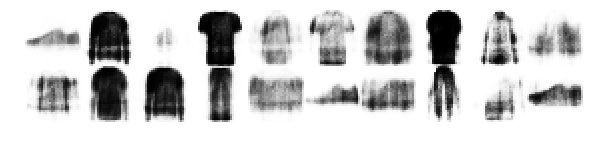

Iter-12000; D_loss: -0.0008133985102176666; G_loss: -0.0014472237089648843


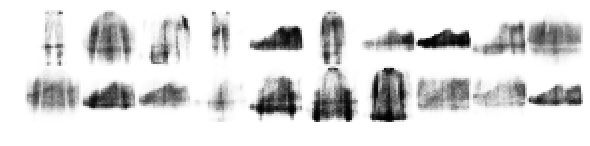

Iter-13000; D_loss: -0.008839944377541542; G_loss: -0.013919422402977943


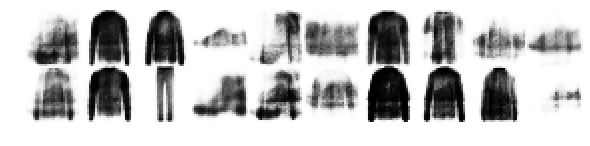

Iter-14000; D_loss: -0.010472617112100124; G_loss: -0.010278533212840557


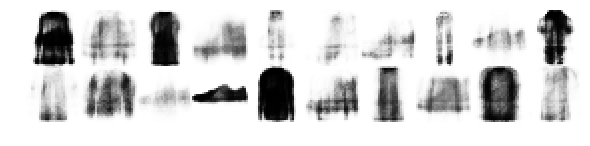

Iter-15000; D_loss: -0.01947629265487194; G_loss: -0.01258203573524952


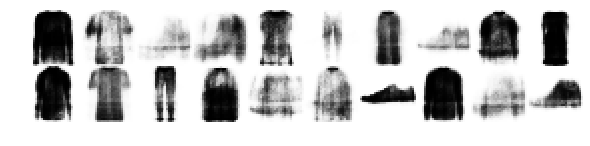

Iter-16000; D_loss: -0.015423497185111046; G_loss: -0.008797144517302513


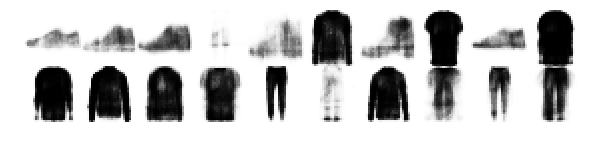

Iter-17000; D_loss: -0.017805179581046104; G_loss: -0.003365135984495282


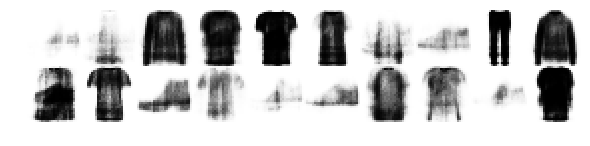

Iter-18000; D_loss: -0.016903948038816452; G_loss: -0.017935020849108696


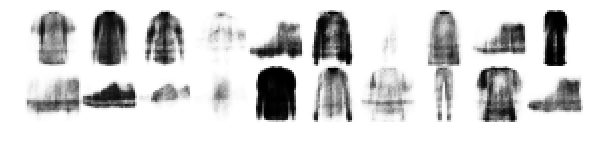

Iter-19000; D_loss: -0.012589111924171448; G_loss: -0.0018273997120559216


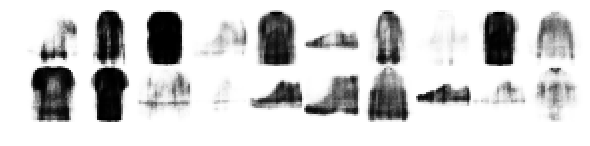

Iter-20000; D_loss: -0.009875888004899025; G_loss: 0.0024872233625501394


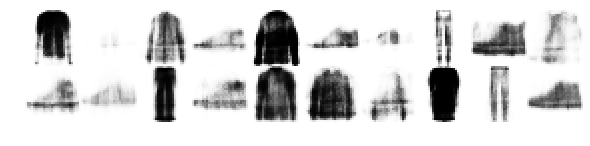

Iter-21000; D_loss: -0.009988744743168354; G_loss: -0.006262042559683323


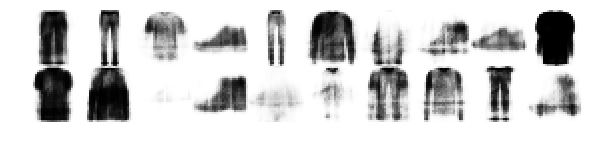

Iter-22000; D_loss: -0.010927531868219376; G_loss: -0.010745078325271606


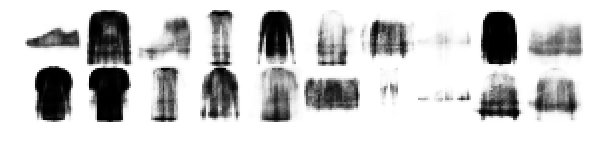

Iter-23000; D_loss: -0.016364412382245064; G_loss: -0.007145036943256855


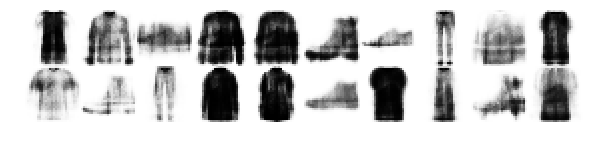

Iter-24000; D_loss: -0.01357237808406353; G_loss: -0.007753659971058369


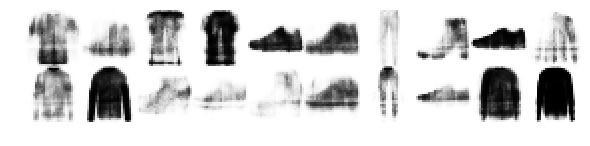

Iter-25000; D_loss: -0.01643584854900837; G_loss: -0.0033708750270307064


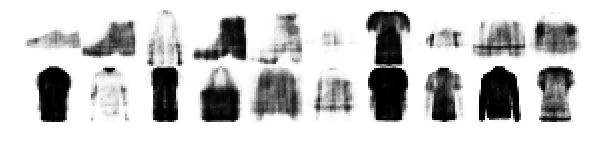

Iter-26000; D_loss: -0.011131985113024712; G_loss: -0.018848732113838196


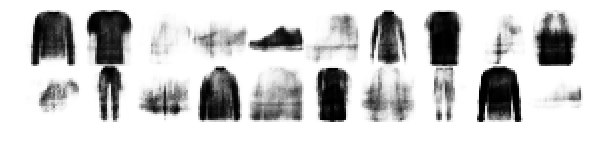

Iter-27000; D_loss: -0.008957961574196815; G_loss: -0.023678120225667953


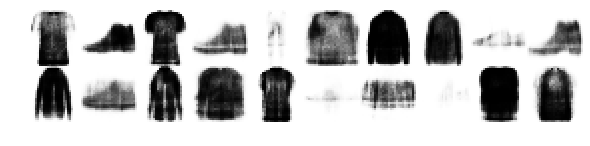

Iter-28000; D_loss: -0.012626088224351406; G_loss: -0.003641434945166111


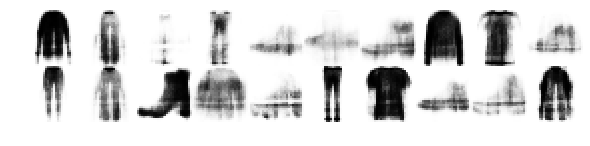

Iter-29000; D_loss: -0.005481845233589411; G_loss: 0.0029698959551751614


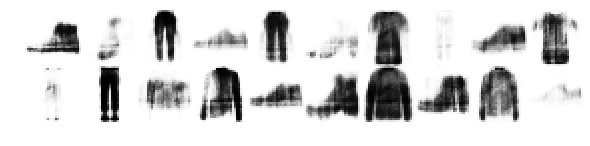

Iter-30000; D_loss: -0.013615572825074196; G_loss: 0.01186620257794857


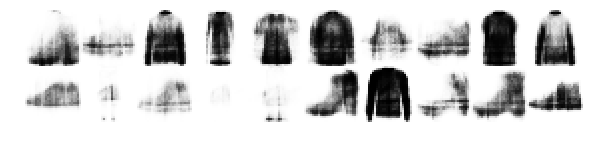

Iter-31000; D_loss: -0.019746996462345123; G_loss: -0.016667857766151428


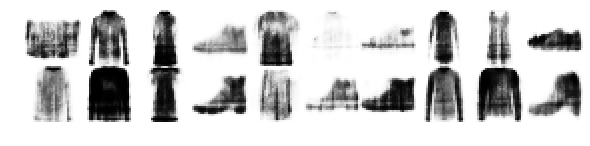

Iter-32000; D_loss: -0.009723619557917118; G_loss: -0.002386715030297637


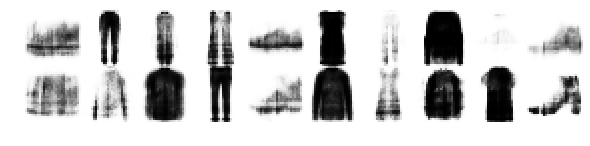

Iter-33000; D_loss: -0.00880464818328619; G_loss: -0.011531341820955276


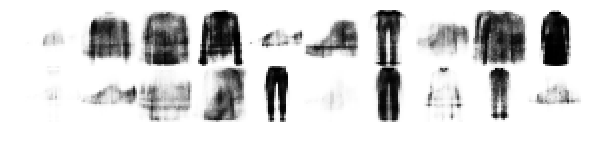

Iter-34000; D_loss: -0.014273757115006447; G_loss: -0.011590661481022835


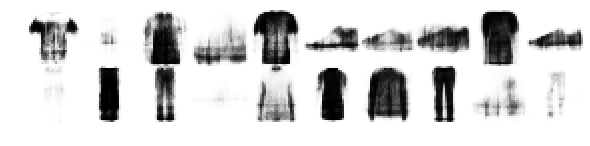

Iter-35000; D_loss: -0.011623089201748371; G_loss: -0.0033963730093091726


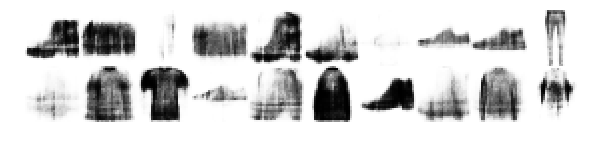

Iter-36000; D_loss: -0.008867575787007809; G_loss: -0.010293813422322273


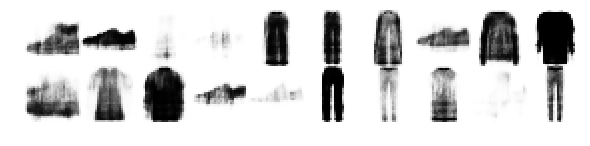

Iter-37000; D_loss: -0.004308613948523998; G_loss: -0.002208076184615493


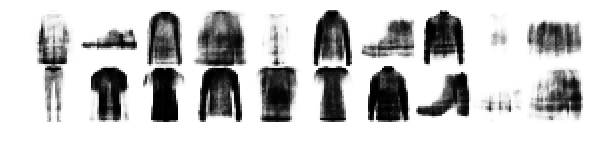

Iter-38000; D_loss: -0.015229083597660065; G_loss: -0.006287700030952692


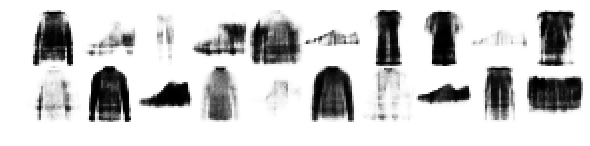

Iter-39000; D_loss: -0.017809251323342323; G_loss: -0.019668495282530785


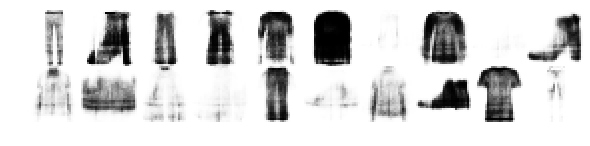

Iter-40000; D_loss: -0.008269411511719227; G_loss: -0.009623521007597446


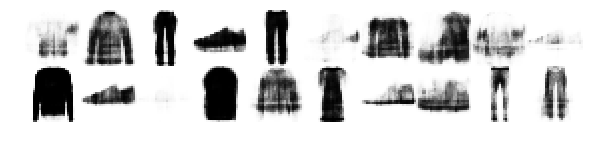

Iter-41000; D_loss: -0.011881592683494091; G_loss: -0.0030759174842387438


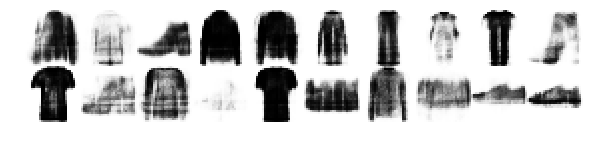

Iter-42000; D_loss: -0.006850883364677429; G_loss: -0.001848498359322548


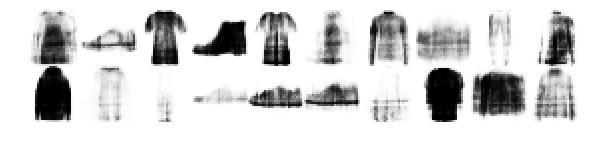

Iter-43000; D_loss: -0.00916842371225357; G_loss: -0.025895673781633377


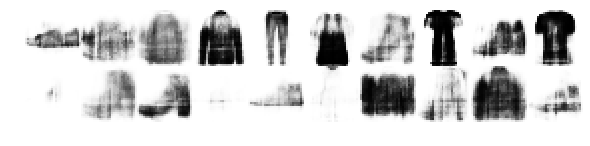

Iter-44000; D_loss: -0.015228665433824062; G_loss: 0.00598215963691473


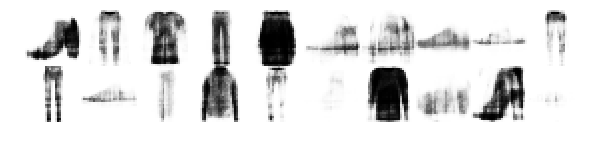

Iter-45000; D_loss: -0.01659909263253212; G_loss: -0.026612015441060066


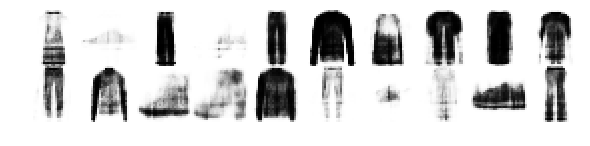

Iter-46000; D_loss: -0.009415115229785442; G_loss: -0.005515674129128456


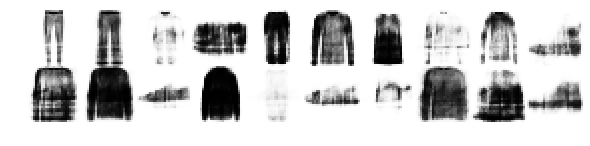

Iter-47000; D_loss: -0.0038870065473020077; G_loss: -0.0025807435158640146


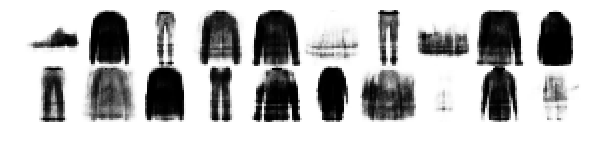

Iter-48000; D_loss: -0.01206330768764019; G_loss: -0.007186518050730228


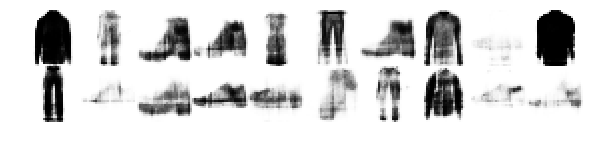

Iter-49000; D_loss: -0.01171682309359312; G_loss: -0.004478501155972481


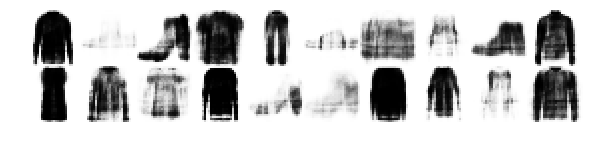

Iter-50000; D_loss: -0.006005251780152321; G_loss: -0.01835089735686779


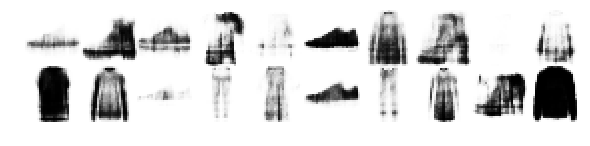

Iter-51000; D_loss: -0.00801706500351429; G_loss: -0.007154151797294617


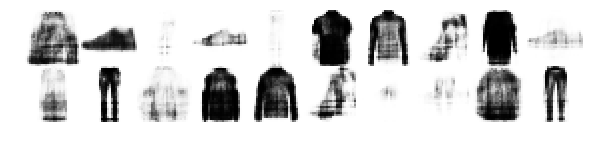

Iter-52000; D_loss: -0.013888094574213028; G_loss: -0.026317713782191277


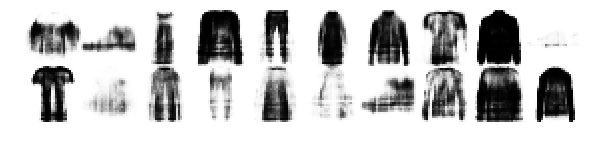

Iter-53000; D_loss: -0.006915966048836708; G_loss: -0.01689118519425392


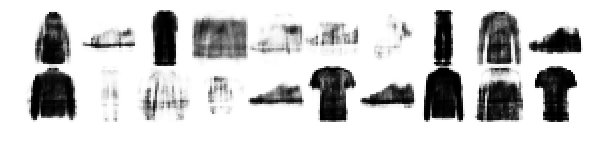

Iter-54000; D_loss: -0.008351006545126438; G_loss: 0.00015786709263920784


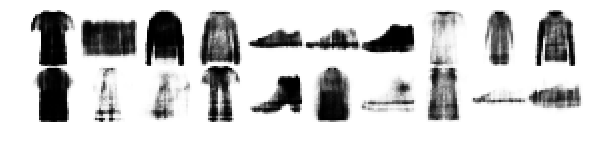

Iter-55000; D_loss: -0.005938094109296799; G_loss: -0.006674645002931356


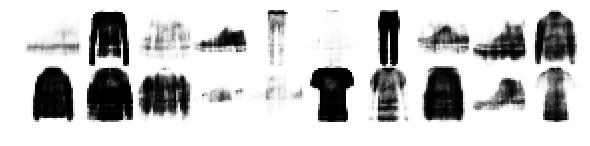

Iter-56000; D_loss: -0.013482518494129181; G_loss: -0.022445617243647575


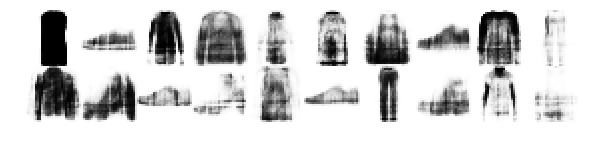

Iter-57000; D_loss: -0.012761031277477741; G_loss: -0.005592568311840296


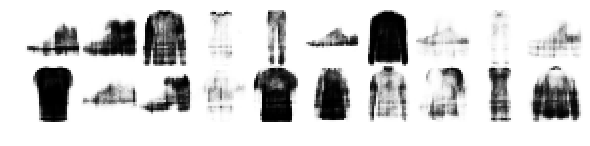

Iter-58000; D_loss: -0.012612029910087585; G_loss: -0.0014998993137851357


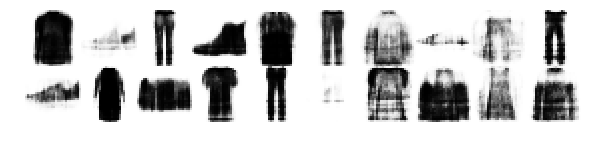

Iter-59000; D_loss: -0.011349201202392578; G_loss: -0.003364311531186104


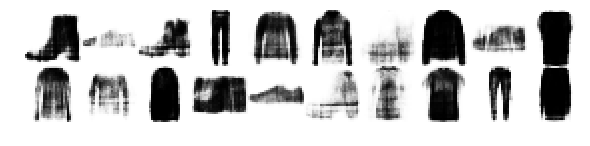

Iter-60000; D_loss: -0.005467471666634083; G_loss: 0.003436754224821925


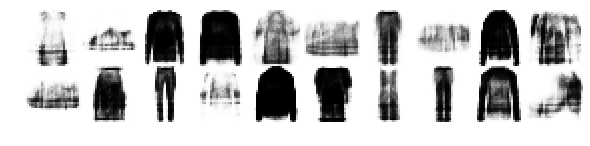

Iter-61000; D_loss: -0.011989123187959194; G_loss: -0.009937174618244171


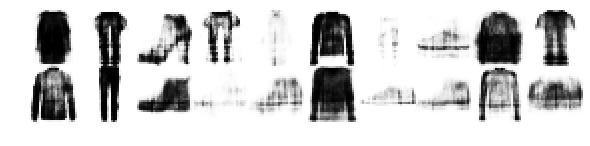

Iter-62000; D_loss: -0.0042888205498456955; G_loss: -0.009026704356074333


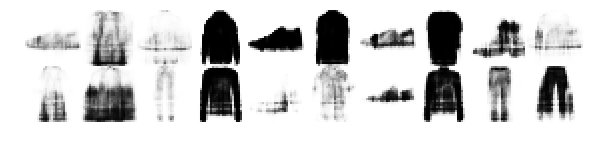

Iter-63000; D_loss: -0.003973085433244705; G_loss: -0.005031197797507048


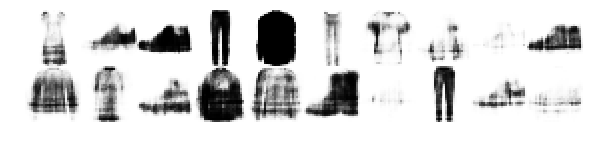

Iter-64000; D_loss: -0.013628728687763214; G_loss: -0.0007931397994980216


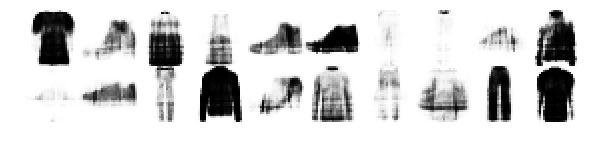

Iter-65000; D_loss: -0.00424986332654953; G_loss: -0.007854534313082695


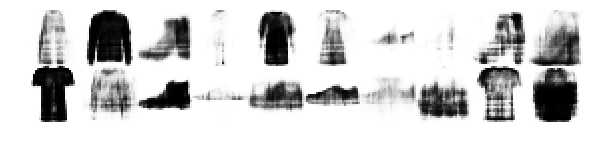

Iter-66000; D_loss: -0.014217091724276543; G_loss: -0.005065141711384058


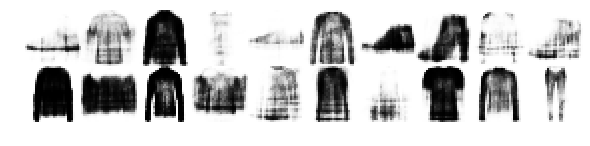

Iter-67000; D_loss: -0.00861198641359806; G_loss: 0.00159564265049994


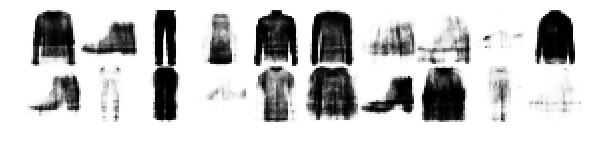

Iter-68000; D_loss: -0.011160464026033878; G_loss: 0.011071594431996346


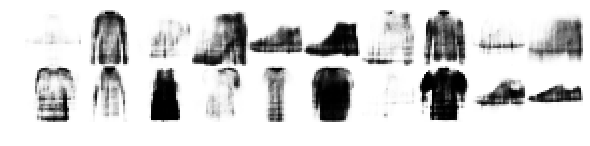

Iter-69000; D_loss: -0.005378929898142815; G_loss: 0.0007775765843689442


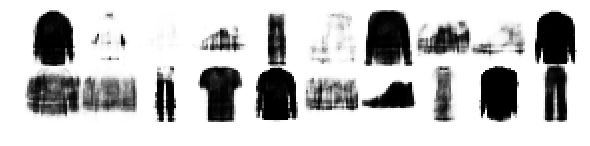

Iter-70000; D_loss: -0.0005969535559415817; G_loss: -0.012832512147724628


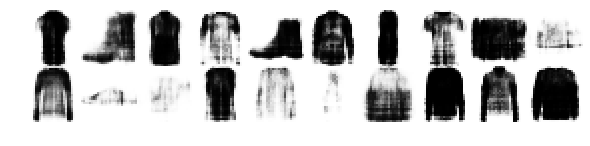

Iter-71000; D_loss: -0.007815888151526451; G_loss: -0.006329146213829517


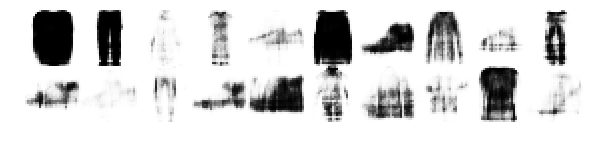

Iter-72000; D_loss: -0.011817192658782005; G_loss: 0.007943419739603996


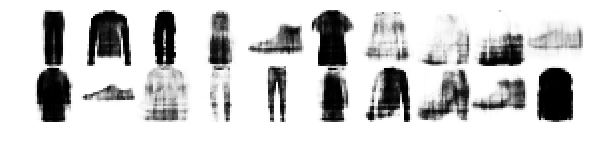

Iter-73000; D_loss: -0.016196874901652336; G_loss: -0.029132718220353127


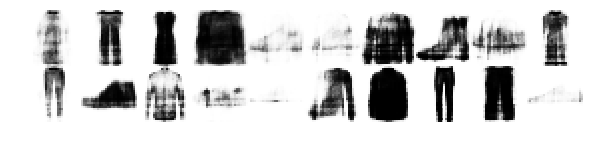

Iter-74000; D_loss: -0.006064355373382568; G_loss: -0.01981366239488125


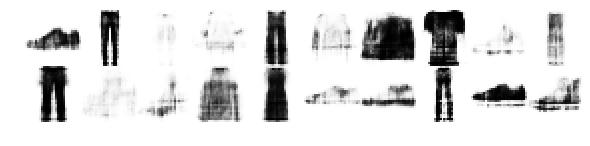

Iter-75000; D_loss: -0.00762622244656086; G_loss: -0.010001130402088165


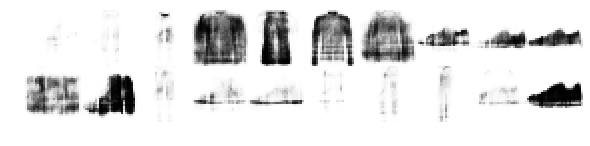

Iter-76000; D_loss: -0.004723036661744118; G_loss: -0.026447461917996407


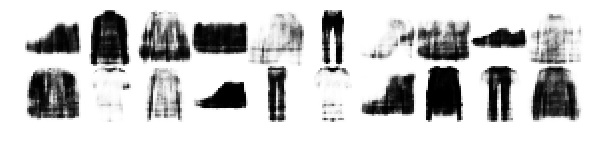

Iter-77000; D_loss: -0.016067877411842346; G_loss: -0.013569710776209831


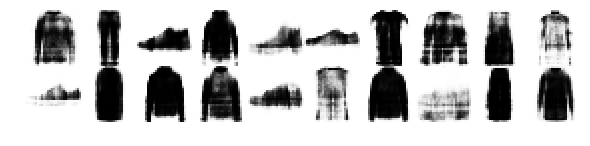

Iter-78000; D_loss: -0.009628786705434322; G_loss: 0.0019226031145080924


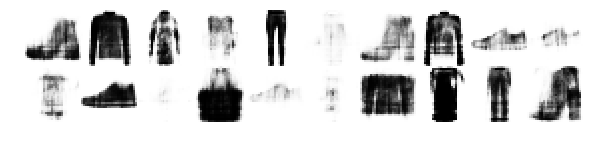

Iter-79000; D_loss: -0.004655714146792889; G_loss: -0.013960049487650394


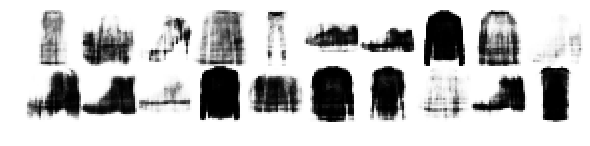

Iter-80000; D_loss: -0.006734529044479132; G_loss: -0.003739255713298917


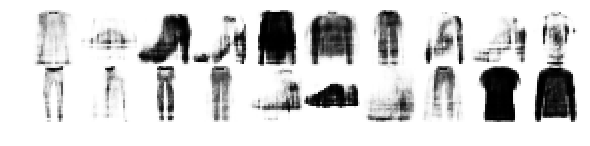

Iter-81000; D_loss: -0.004753896966576576; G_loss: -0.009184621274471283


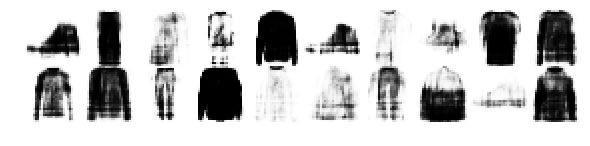

Iter-82000; D_loss: -0.009826643392443657; G_loss: 0.010979462414979935


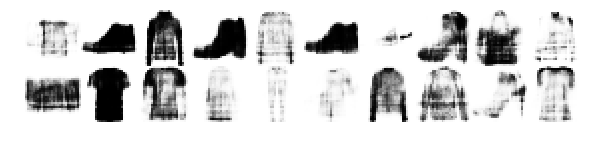

Iter-83000; D_loss: -0.005890773609280586; G_loss: -0.021935850381851196


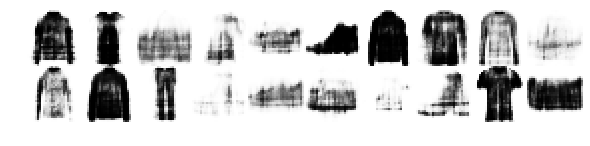

Iter-84000; D_loss: -0.005918731912970543; G_loss: -4.0475919377058744e-05


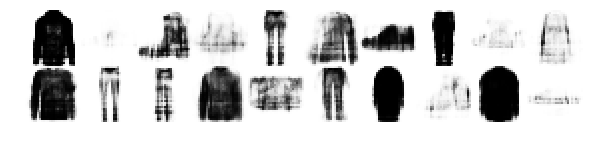

Iter-85000; D_loss: -0.005511144176125526; G_loss: -0.01793350651860237


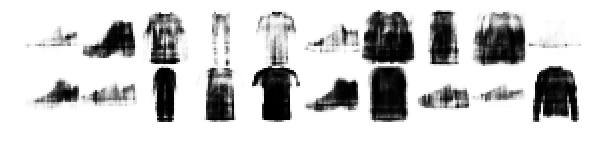

Iter-86000; D_loss: -0.011484537273645401; G_loss: -0.018212314695119858


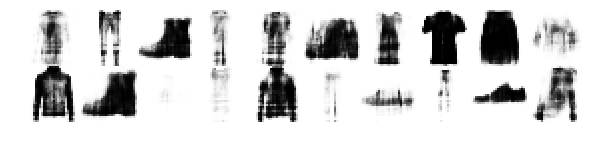

Iter-87000; D_loss: -0.005613945424556732; G_loss: -0.006121216341853142


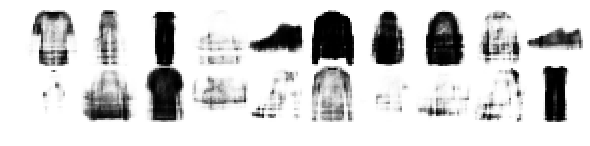

Iter-88000; D_loss: 0.001679055392742157; G_loss: -0.007884038612246513


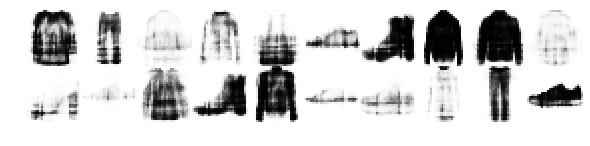

Iter-89000; D_loss: -0.004954056814312935; G_loss: -0.01457197405397892


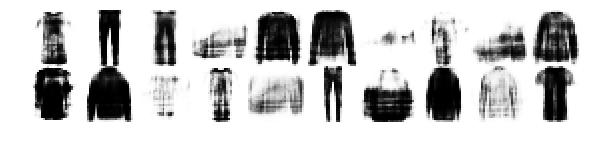

Iter-90000; D_loss: -0.0063428813591599464; G_loss: -0.011009689420461655


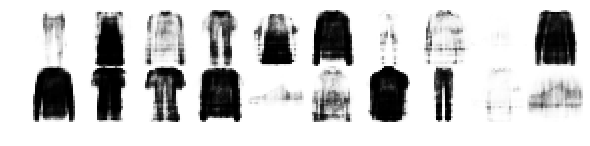

Iter-91000; D_loss: -0.007557784207165241; G_loss: -0.003383992239832878


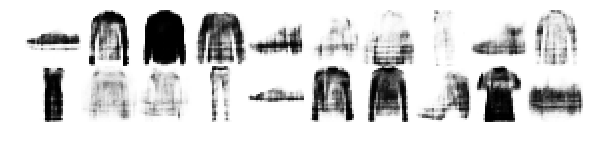

Iter-92000; D_loss: -0.009796852245926857; G_loss: -0.019659165292978287


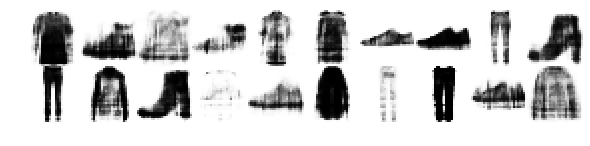

Iter-93000; D_loss: -0.004443570040166378; G_loss: 0.001985573908314109


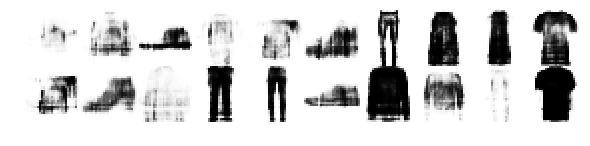

Iter-94000; D_loss: -0.0030667781829833984; G_loss: -0.012701748870313168


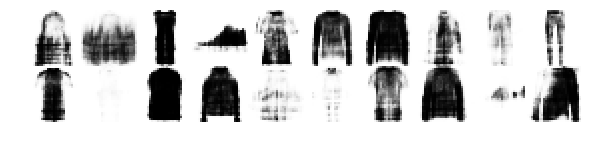

Iter-95000; D_loss: -0.01149768102914095; G_loss: -0.0002004608977586031


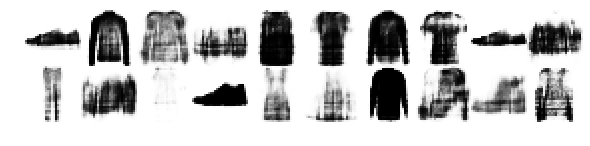

Iter-96000; D_loss: -0.009169607423245907; G_loss: -0.00026200624415650964


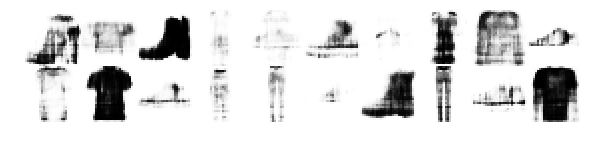

Iter-97000; D_loss: -0.008840234950184822; G_loss: 0.011844081804156303


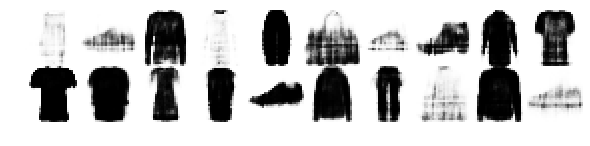

Iter-98000; D_loss: -0.008676237426698208; G_loss: 0.004478138405829668


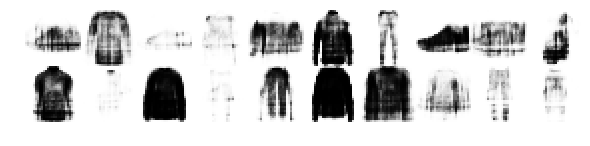

Iter-99000; D_loss: -0.007985671050846577; G_loss: -0.008944590575993061


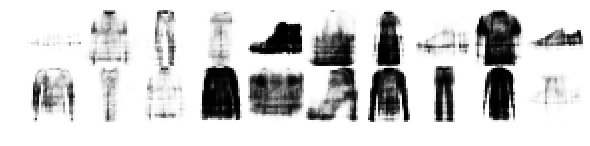

Iter-100000; D_loss: -0.005190226249396801; G_loss: -0.007930252701044083


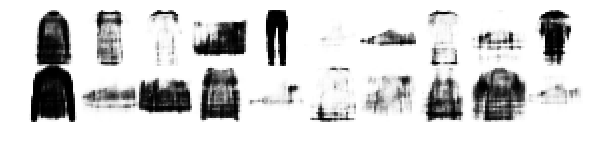

Iter-101000; D_loss: -0.00022212788462638855; G_loss: -0.006771557964384556


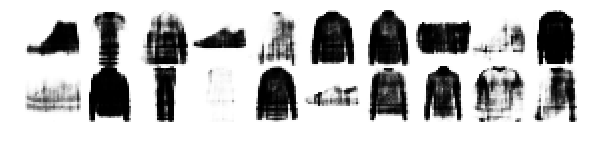

Iter-102000; D_loss: -0.010046864859759808; G_loss: -0.01306049432605505


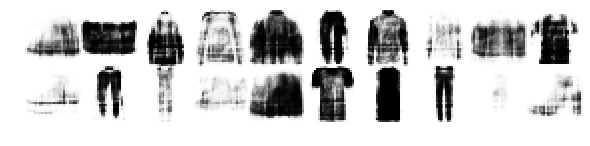

Iter-103000; D_loss: 0.0029310081154108047; G_loss: -0.007382218260318041


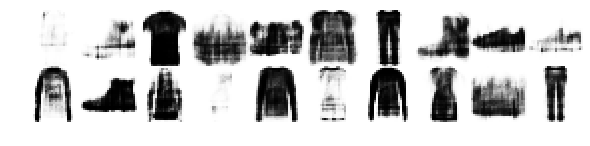

Iter-104000; D_loss: 0.0024562422186136246; G_loss: 0.019672593101859093


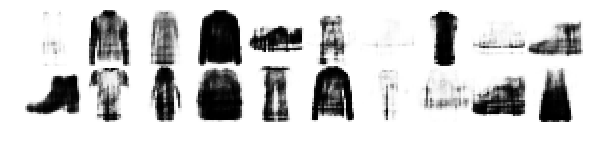

Iter-105000; D_loss: -0.007785647641867399; G_loss: -0.008143807761371136


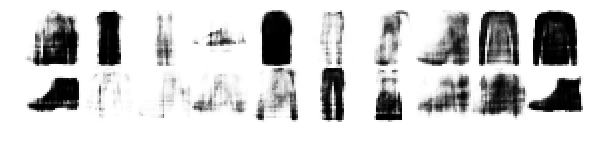

Iter-106000; D_loss: -0.009875906631350517; G_loss: -0.010675392113626003


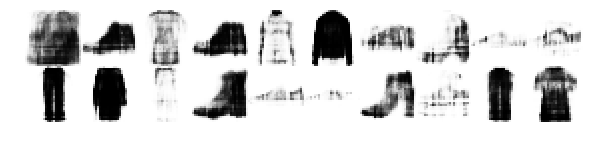

Iter-107000; D_loss: -0.008029904216527939; G_loss: -0.012619269080460072


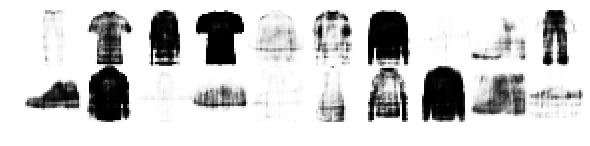

Iter-108000; D_loss: -0.0040269820019602776; G_loss: -0.014730803668498993


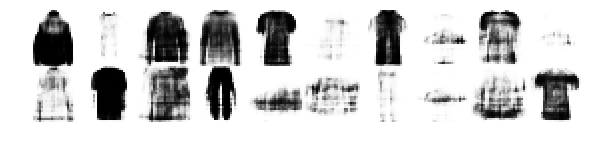

Iter-109000; D_loss: -0.0023315735161304474; G_loss: -0.014614759013056755


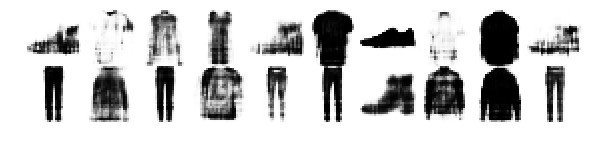

Iter-110000; D_loss: 0.000431242398917675; G_loss: -0.015560762956738472


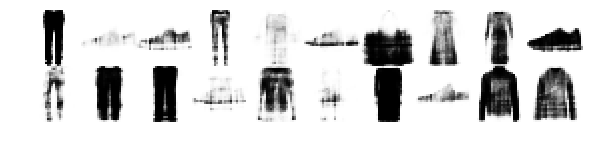

Iter-111000; D_loss: -0.013046827167272568; G_loss: -0.015317569486796856


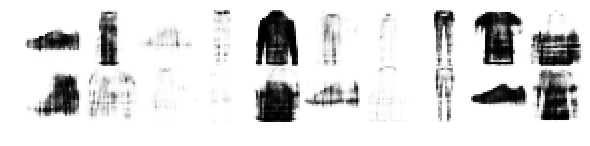

Iter-112000; D_loss: -0.007620447315275669; G_loss: -0.01038152351975441


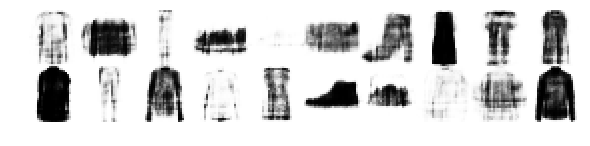

Iter-113000; D_loss: 0.0010368674993515015; G_loss: -0.022604964673519135


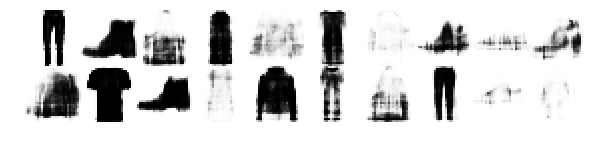

Iter-114000; D_loss: -0.005348479375243187; G_loss: -0.025232892483472824


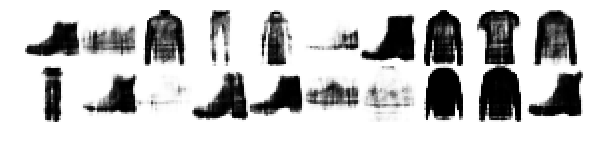

Iter-115000; D_loss: -0.013086151331663132; G_loss: -0.00856226310133934


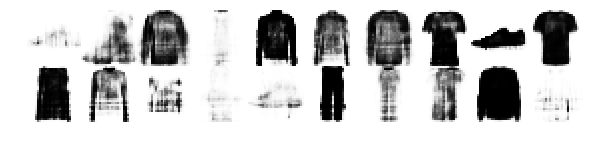

Iter-116000; D_loss: 0.00015285424888134003; G_loss: 0.002129478147253394


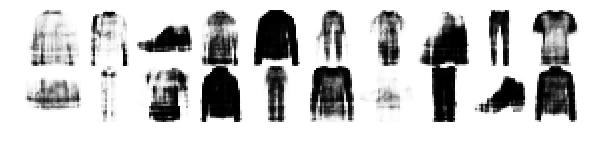

Iter-117000; D_loss: -0.005810437723994255; G_loss: -0.01752338372170925


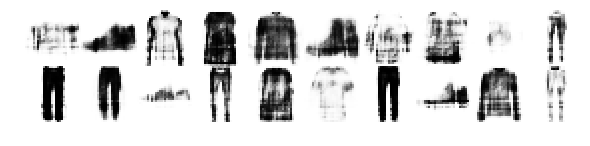

Iter-118000; D_loss: 0.0008347807452082634; G_loss: -0.009242930449545383


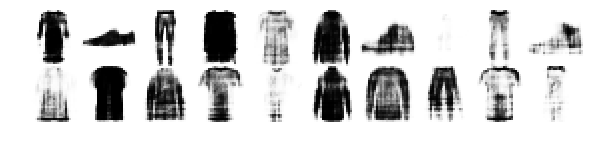

Iter-119000; D_loss: -0.01383906975388527; G_loss: 0.014474840834736824


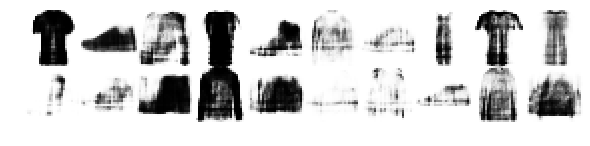

Iter-120000; D_loss: -0.0038912566378712654; G_loss: -0.010823781602084637


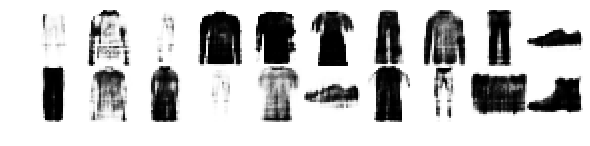

Iter-121000; D_loss: -0.006987311877310276; G_loss: -0.0078064859844744205


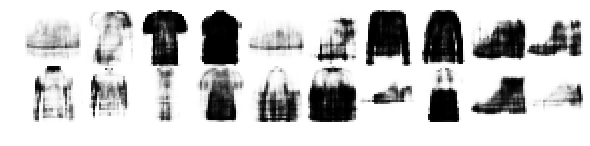

Iter-122000; D_loss: -0.009755413979291916; G_loss: 0.01914914883673191


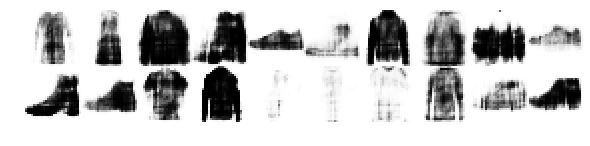

Iter-123000; D_loss: -0.008106047287583351; G_loss: 0.009192701429128647


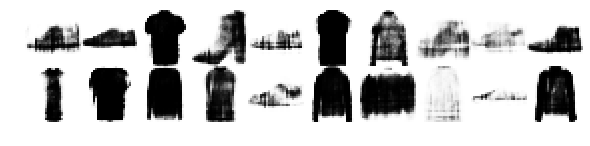

Iter-124000; D_loss: -0.011454010382294655; G_loss: 0.008651996962726116


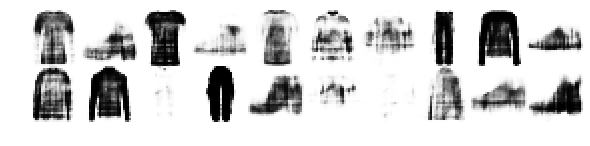

Iter-125000; D_loss: 0.010508175007998943; G_loss: 0.015419703908264637


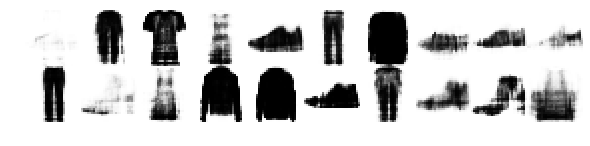

Iter-126000; D_loss: -0.007759038358926773; G_loss: -0.015450697392225266


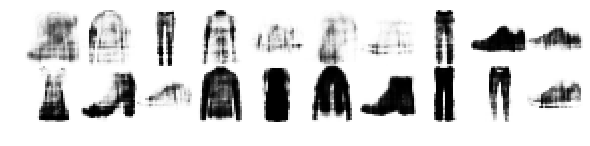

Iter-127000; D_loss: -0.01431537140160799; G_loss: 0.010528183542191982


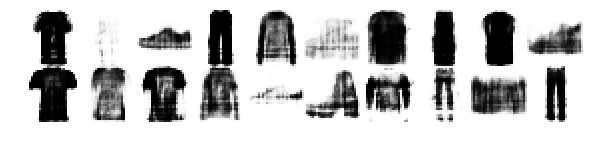

Iter-128000; D_loss: 0.0003604050725698471; G_loss: -0.0029685611370950937


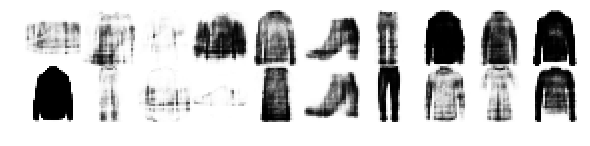

Iter-129000; D_loss: -0.010667433962225914; G_loss: -0.011007367633283138


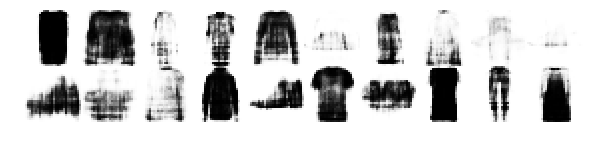

In [0]:
for it in range(1000000):
    for _ in range(5):
        # Sample data
        z = Variable(torch.randn(mb_size, z_dim))
        idxs = np.random.choice(60000, mb_size)
        X = Variable(fmnist[idxs])

        # Dicriminator forward-loss-backward-update
        G_sample = G(z)
        D_real = D(X)
        D_fake = D(G_sample)

        D_loss = -(torch.mean(D_real) - torch.mean(D_fake))

        D_loss.backward()
        D_solver.step()

        # Weight clipping
        for p in D.parameters():
            p.data.clamp_(-0.01, 0.01)

        # Housekeeping - reset gradient
        reset_grad()

    # Generator forward-loss-backward-update
    idxs = np.random.choice(60000, mb_size)
    X = Variable(fmnist[idxs])
    z = Variable(torch.randn(mb_size, z_dim))

    G_sample = G(z)
    D_fake = D(G_sample)

    G_loss = -torch.mean(D_fake)

    G_loss.backward()
    G_solver.step()

    # Housekeeping - reset gradient
    reset_grad()

    # Print and plot every now and then
    if it % 1000 == 0:
        print('Iter-{}; D_loss: {}; G_loss: {}'
              .format(it, D_loss.data.numpy(), G_loss.data.numpy()))

        samples = G(z).data.numpy()[:20]
        show_mnist(samples)